In [134]:
import DataHub as hub
h=hub.Handle.create('Barra')

In [135]:
# Import numpy and pandas 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import calendar

# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.metrics import r2_score

# Cross-sectional Regression
## from 2006 to 2018 daily regression with eigens calculated on a monthly based matrix

In [105]:
name_list=['BetaExp', 'DividendYieldExp',
       'EarningsQualityExp', 'EarningsYieldExp', 'GrowthExp', 'LeverageExp',
       'LiquidityExp', 'LongTermReversalExp', 'ManagementQualityExp',
       'MidCapitalizationExp', 'MomentumExp', 'ProfitabilityExp',
       'ProspectExp', 'SizeExp', 'ValueExp', 'ResidualVolatilityExp',
       'AirlinesExp', 'AluminumSteelExp', 'ApparelandTextilesExp',
       'AutomobilesandComponentsExp', 'BanksExp', 'BeveragesTobaccoExp',
       'BiotechnologyLifeSciencesExp', 'BuildingProductsExp', 'ChemicalsExp',
       'CommercialandProfessionalServicesExp', 'CommunicationsEquipmentExp',
       'ComputersElectronicsExp', 'ConstructionMaterialsExp',
       'ConstructionandEngineeringExp', 'ConstructionandFarmMachineryExp',
       'ContainersandPackagingExp', 'DistributorsMultilineRetailExp',
       'DiversifiedFinancialsExp', 'DiversifiedTelecommunicationServicesExp',
       'ElectricUtilitiesExp', 'ElectricalEquipmentExp', 'FoodProductsExp',
       'FoodandStaplesRetailingExp', 'GasUtilitiesExp',
       'HealthCareEquipmentandTechnologyExp', 'HealthCareProvidersExp',
       'HomebuildingExp', 'HotelsLeisureandConsumerServicesExp',
       'HouseholdDurablesExp', 'HouseholdandPersonalProductsExp',
       'IndustrialConglomeratesExp', 'IndustrialMachineryExp',
       'InsuranceBrokersandReinsuranceExp', 'InternetSoftwareandITServicesExp',
       'InternetandCatalogRetailExp',
       'LeisureProductsTextilesApparelandLuxuryExp',
       'LifeHealthandMultilineInsuranceExp', 'ManagedHealthCareExp',
       'MediaExp', 'MultiUtilitiesWaterUtilitiesPowerExp',
       'OilGasandConsumableFuelsExp', 'OilandGasDrillingExp',
       'OilandGasEquipmentandServicesExp',
       'OilandGasExplorationandProductionExp', 'PaperandForestProductsExp',
       'PharmaceuticalsExp', 'PreciousMetalsGoldMiningExp', 'RealEstateExp',
       'RestaurantsExp', 'RoadandRailExp', 'SemiconductorEquipmentExp',
       'SemiconductorsExp', 'SoftwareExp', 'SpecialtyChemicalsExp',
       'SpecialtyRetailExp', 'SpecialtyStoresExp',
       'TradingCompaniesandDistributorsExp',
       'TransportationAirFreightandMarineExp',
       'WirelessTelecommunicationServicesExp']
style_factor=['BetaExp', 'DividendYieldExp',
       'EarningsQualityExp', 'EarningsYieldExp', 'GrowthExp', 'LeverageExp',
       'LiquidityExp', 'LongTermReversalExp', 'ManagementQualityExp',
       'MidCapitalizationExp', 'MomentumExp', 'ProfitabilityExp',
       'ProspectExp', 'SizeExp', 'ValueExp', 'ResidualVolatilityExp']
N18='return_shift'

In [106]:
industry_list=['AirlinesExp', 'AluminumSteelExp', 'ApparelandTextilesExp',
       'AutomobilesandComponentsExp', 'BanksExp', 'BeveragesTobaccoExp',
       'BiotechnologyLifeSciencesExp', 'BuildingProductsExp', 'ChemicalsExp',
       'CommercialandProfessionalServicesExp', 'CommunicationsEquipmentExp',
       'ComputersElectronicsExp', 'ConstructionMaterialsExp',
       'ConstructionandEngineeringExp', 'ConstructionandFarmMachineryExp',
       'ContainersandPackagingExp', 'DistributorsMultilineRetailExp',
       'DiversifiedFinancialsExp', 'DiversifiedTelecommunicationServicesExp',
       'ElectricUtilitiesExp', 'ElectricalEquipmentExp', 'FoodProductsExp',
       'FoodandStaplesRetailingExp', 'GasUtilitiesExp',
       'HealthCareEquipmentandTechnologyExp', 'HealthCareProvidersExp',
       'HomebuildingExp', 'HotelsLeisureandConsumerServicesExp',
       'HouseholdDurablesExp', 'HouseholdandPersonalProductsExp',
       'IndustrialConglomeratesExp', 'IndustrialMachineryExp',
       'InsuranceBrokersandReinsuranceExp', 'InternetSoftwareandITServicesExp',
       'InternetandCatalogRetailExp',
       'LeisureProductsTextilesApparelandLuxuryExp',
       'LifeHealthandMultilineInsuranceExp', 'ManagedHealthCareExp',
       'MediaExp', 'MultiUtilitiesWaterUtilitiesPowerExp',
       'OilGasandConsumableFuelsExp', 'OilandGasDrillingExp',
       'OilandGasEquipmentandServicesExp',
       'OilandGasExplorationandProductionExp', 'PaperandForestProductsExp',
       'PharmaceuticalsExp', 'PreciousMetalsGoldMiningExp', 'RealEstateExp',
       'RestaurantsExp', 'RoadandRailExp', 'SemiconductorEquipmentExp',
       'SemiconductorsExp', 'SoftwareExp', 'SpecialtyChemicalsExp',
       'SpecialtyRetailExp', 'SpecialtyStoresExp',
       'TradingCompaniesandDistributorsExp',
       'TransportationAirFreightandMarineExp',
       'WirelessTelecommunicationServicesExp']

In [5]:

# use eigenvalue1 to store the first eigen of residuals in each month        
eigenvalue1=[]
# use eigenvalue2 to store the first eigen of raw return in each month
eigenvalue2=[]
# use yymm to store the year and month for drawing data
yymm=[]

max_k = 16
eigenvalue_submodels = [[] for _ in range(max_k)]

# 
eigenvalue_lack_factor=pd.DataFrame()

for year in range(2006,2019):
    for month in range(1,13):
        yymm.append(year*100+month)
        mrange=calendar.monthrange(year,month)
        start_date= '%d%02d%02d'%(year,month,1)
        end_date = '%d%02d%02d'%(year,month,mrange[1])
        # load monthly data
        loadings = h.read('DailyFactor', start=start_date, end=end_date)
        # count(distinct(date)) to get the number of available dates, N
        Ndays=loadings['date'].unique().shape[0]
        # count(*) group by TICKER_US to get a table with number of records (dates) for each ticker
        loadings_ndays=loadings[['date', 'ticker']].groupby('ticker').count().reset_index()
        tickers=loadings_ndays[loadings_ndays['date']==Ndays]['ticker']
        # Filter the table above by selecting the ticker with number of records (days) equal to N
        loadings=loadings.loc[loadings['ticker'].isin(list(tickers))]
        # Note that the Return data stored in risklab has left out the percentage
        loadings['ReturnPct']=loadings['ReturnPct']*0.01
        
        # shifting tomorrow's return to today's row
        loadings['return_shift'] = loadings.groupby('ticker')['ReturnPct'].shift(-1)
        loadings=loadings.dropna()
        # set multiindex       
        loadings=loadings.set_index(['date', 'ticker']).sort_index()
        # draw out the timestamp for every month
        M=loadings.index.get_level_values(0)
        Timestamp = []
        for i in M:
            if not i in Timestamp:
                Timestamp.append(i)

                
                
        residual = pd.DataFrame()
        for i in range(len(Timestamp)):
            Xi = pd.DataFrame()
            # For each month, we load 'retun_shift' 
            Yi = np.array((loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True))
            for j in range(len(name_list)):                        
                # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
                Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[j]]).reset_index(drop=True))
                Xi[j] = Xij
                    
            # linear regression
            linreg.fit(Xi, Yi)
            residuali = np.array(Yi - linreg.predict(Xi))
            residual[i]=residuali
            
        residualT=residual.T
        residualT=residualT.fillna(method='ffill')
        residual=residualT.T
        P= np.dot(residualT.values,residual.values)
        P=P/(residualT.shape[1])
        eigenvalue12_1,featurevector=np.linalg.eig(P)
        eigenvalue12_1=sorted(list(eigenvalue12_1),reverse=True)
        eigenvalue1.append(np.max(eigenvalue12_1))  
                           
                
                
                               
        for k in range(16):            
            residual = pd.DataFrame()
            for i in range(len(Timestamp)):
                Xi = pd.DataFrame()
                # For each month, we load 'retun_shift' 
                Yi = np.array((loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True))

                for j in range(len(name_list)):
                    if j == k:
                        continue
                        
                    # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
                    Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[j]]).reset_index(drop=True))
                    Xi[j] = Xij
                    
                # linear regression
                linreg.fit(Xi, Yi)
                residuali = np.array(Yi - linreg.predict(Xi))
                residual[i]=residuali
            residualT=residual.T
            residualT=residualT.fillna(method='ffill')
            residual=residualT.T
            P= np.dot(residualT.values,residual.values)
            P=P/(residualT.shape[1])
            eigenvalue12_1_sub,featurevector=np.linalg.eig(P)
            eigenvalue12_1_sub=sorted(list(eigenvalue12_1_sub),reverse=True)
            
            eigenvalue_submodels[k].append(np.max(eigenvalue12_1_sub))
            
            # eigenvalue_submodels[i][j] - i-th model, j-th day
            # eigenvalue_submodels[i][:],
            
        # Construct a dataframe only for return
        Ri=pd.DataFrame()
        for i in range(len(Timestamp)):
            Rij = np.array((loadings.loc[(Timestamp[i],slice(None)),N18]).reset_index(drop=True))
            Ri[i]=Rij
        Return_shift=Ri.T
        Return_shift=Return_shift.fillna(method='ffill')
        Return_shiftT=Return_shift.T
        Q= np.dot(Return_shift.values,Return_shiftT.values)
        Q = Q/(Ri.shape[0])
        eigenvalue12_2,featurevector2=np.linalg.eig(Q)
        eigenvalue12_2=sorted(list(eigenvalue12_2),reverse=True)
        eigenvalue2.append(np.max(eigenvalue12_2))
        
        
       
        print(year,month)        

/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2006 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2007 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2008 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2009 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2011 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2013 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2014 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2016 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2017 12


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 1


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 2


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 3


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 4


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 5


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 6


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 7


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 8


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 9


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 10


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 11


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018 12


# Reduction Result of complete exposures and exposures lacking one style factor exposusre at a time

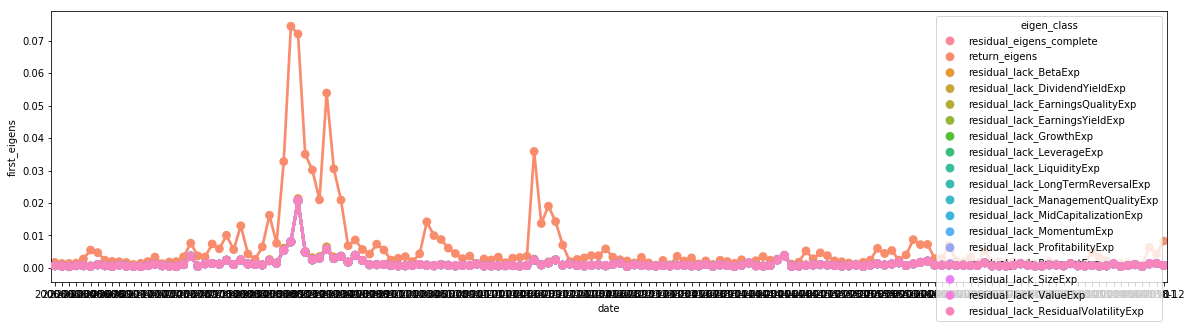

In [25]:
import matplotlib.pyplot as plt

date = pd.period_range("2006-01", freq="M", periods=156)
df1 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue1)})
df2 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue2)})

df_1 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[0][:])})
df_2 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[1][:])})
df_3 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[2][:])})
df_4 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[3][:])})
df_5 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[4][:])})
df_6 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[5][:])})
df_7 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[6][:])})
df_8 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[7][:])})
df_9 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[8][:])})
df_10 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[9][:])})
df_11 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[10][:])})
df_12 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[11][:])})
df_13 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[12][:])})
df_14 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[13][:])})
df_15 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[14][:])})
df_16 = pd.DataFrame({"date":date, "first_eigens" : np.array(eigenvalue_submodels[15][:])})




df1['eigen_class'] = 'residual_eigens_complete'
df2['eigen_class'] = 'return_eigens'
df_1['eigen_class'] = 'residual_lack_BetaExp'
df_2['eigen_class'] = 'residual_lack_DividendYieldExp'
df_3['eigen_class'] = 'residual_lack_EarningsQualityExp'
df_4['eigen_class'] = 'residual_lack_EarningsYieldExp'
df_5['eigen_class'] = 'residual_lack_GrowthExp'
df_6['eigen_class'] = 'residual_lack_LeverageExp'
df_7['eigen_class'] = 'residual_lack_LiquidityExp'
df_8['eigen_class'] = 'residual_lack_LongTermReversalExp'
df_9['eigen_class'] = 'residual_lack_ManagementQualityExp'
df_10['eigen_class'] = 'residual_lack_MidCapitalizationExp'
df_11['eigen_class'] = 'residual_lack_MomentumExp'
df_12['eigen_class'] = 'residual_lack_ProfitabilityExp'
df_13['eigen_class'] = 'residual_lack_ProspectExp'
df_14['eigen_class'] = 'residual_lack_SizeExp'
df_15['eigen_class'] = 'residual_lack_ValueExp'
df_16['eigen_class'] = 'residual_lack_ResidualVolatilityExp'




df = pd.concat([df1,df2,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16])
x_col='date'
y_col = 'first_eigens'
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,1,1)
sns.pointplot(x=x_col,y=y_col,data=df,hue='eigen_class')

# Reduction Result shown in proportion

In [21]:
func = lambda x,y:x/y
complete_prop = list(map(func,eigenvalue1,eigenvalue2))
prop_lack_BetaExp = list(map(func,eigenvalue_submodels[0][:],eigenvalue2))
prop_lack_DividendYieldExp = list(map(func,eigenvalue_submodels[1][:],eigenvalue2))
prop_lack_EarningsQualityExp = list(map(func,eigenvalue_submodels[2][:],eigenvalue2))
prop_lack_EarningsYieldExp = list(map(func,eigenvalue_submodels[3][:],eigenvalue2))
prop_lack_GrowthExp = list(map(func,eigenvalue_submodels[4][:],eigenvalue2))
prop_lack_LeverageExp = list(map(func,eigenvalue_submodels[5][:],eigenvalue2))
prop_lack_LiquidityExp = list(map(func,eigenvalue_submodels[6][:],eigenvalue2))
prop_lack_LongTermReversalExp = list(map(func,eigenvalue_submodels[7][:],eigenvalue2))
prop_lack_ManagementQualityExp = list(map(func,eigenvalue_submodels[8][:],eigenvalue2))
prop_lack_MidCapitalizationExp = list(map(func,eigenvalue_submodels[9][:],eigenvalue2))
prop_lack_MomentumExp = list(map(func,eigenvalue_submodels[10][:],eigenvalue2))
prop_lack_ProfitabilityExp = list(map(func,eigenvalue_submodels[11][:],eigenvalue2))
prop_lack_ProspectExp = list(map(func,eigenvalue_submodels[12][:],eigenvalue2))
prop_lack_SizeExp = list(map(func,eigenvalue_submodels[13][:],eigenvalue2))
prop_lack_ValueExp = list(map(func,eigenvalue_submodels[14][:],eigenvalue2))
prop_lack_ResidualVolatilityExp = list(map(func,eigenvalue_submodels[15][:],eigenvalue2))


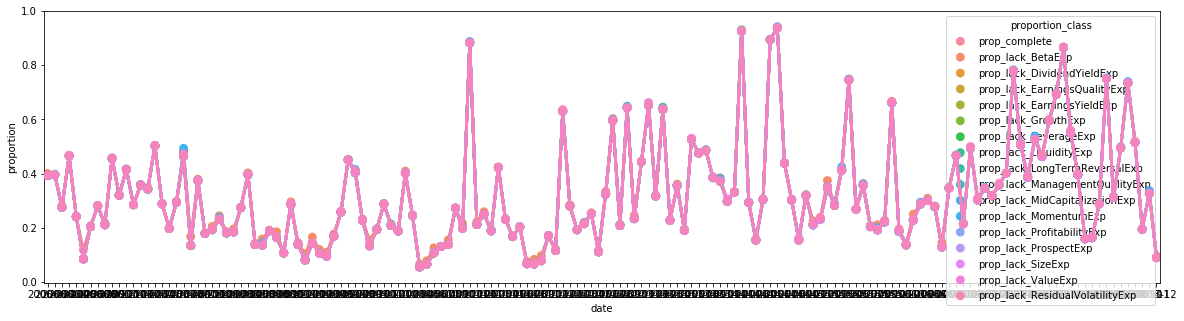

In [26]:
import matplotlib.pyplot as plt

date = pd.period_range("2006-01", freq="M", periods=156)
df1 = pd.DataFrame({"date":date, "proportion" : np.array(complete_prop)})

df_1 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_BetaExp)})
df_2 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_DividendYieldExp)})
df_3 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_EarningsQualityExp)})
df_4 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_EarningsYieldExp)})
df_5 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_GrowthExp)})
df_6 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_LeverageExp)})
df_7 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_LiquidityExp)})
df_8 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_LongTermReversalExp)})
df_9 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_ManagementQualityExp)})
df_10 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_MidCapitalizationExp)})
df_11 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_MomentumExp)})
df_12 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_ProfitabilityExp)})
df_13 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_ProspectExp)})
df_14 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_SizeExp)})
df_15 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_ValueExp)})
df_16 = pd.DataFrame({"date":date, "proportion" : np.array(prop_lack_ResidualVolatilityExp)})




df1['proportion_class'] = 'prop_complete'
df_1['proportion_class'] = 'prop_lack_BetaExp'
df_2['proportion_class'] = 'prop_lack_DividendYieldExp'
df_3['proportion_class'] = 'prop_lack_EarningsQualityExp'
df_4['proportion_class'] = 'prop_lack_EarningsYieldExp'
df_5['proportion_class'] = 'prop_lack_GrowthExp'
df_6['proportion_class'] = 'prop_lack_LeverageExp'
df_7['proportion_class'] = 'prop_lack_LiquidityExp'
df_8['proportion_class'] = 'prop_lack_LongTermReversalExp'
df_9['proportion_class'] = 'prop_lack_ManagementQualityExp'
df_10['proportion_class'] = 'prop_lack_MidCapitalizationExp'
df_11['proportion_class'] = 'prop_lack_MomentumExp'
df_12['proportion_class'] = 'prop_lack_ProfitabilityExp'
df_13['proportion_class'] = 'prop_lack_ProspectExp'
df_14['proportion_class'] = 'prop_lack_SizeExp'
df_15['proportion_class'] = 'prop_lack_ValueExp'
df_16['proportion_class'] = 'prop_lack_ResidualVolatilityExp'




df = pd.concat([df1,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16])
x_col='date'
y_col = 'proportion'
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,1,1)
sns.pointplot(x=x_col,y=y_col,data=df,hue='proportion_class')

In [83]:
print('The average first eigen proportion of %s is %.5f'% ('complete exposures', np.mean(complete_prop)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack BetaExp)', np.mean(prop_lack_BetaExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack DividendYieldExp)', np.mean(prop_lack_DividendYieldExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack EarningsQualityExp)', np.mean(prop_lack_EarningsQualityExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack EarningsYieldExp)', np.mean(prop_lack_EarningsYieldExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack GrowthExp)', np.mean(prop_lack_GrowthExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack LeverageExp)', np.mean(prop_lack_LeverageExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack LiquidityExp)', np.mean(prop_lack_LiquidityExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack LongTermReversalExp)', np.mean(prop_lack_LongTermReversalExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack ManagementQualityExp)', np.mean(prop_lack_ManagementQualityExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack MidCapitalizationExp)', np.mean(prop_lack_MidCapitalizationExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack MomentumExp)', np.mean(prop_lack_MomentumExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack ProfitabilityExp)', np.mean(prop_lack_ProfitabilityExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack ProspectExp)', np.mean(prop_lack_ProspectExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack SizeExp)', np.mean(prop_lack_SizeExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack ValueExp)', np.mean(prop_lack_ValueExp)))
print('The average first eigen proportion of %s is %.5f'% ('exposures (lack ResidualVolatilityExp)', np.mean(prop_lack_ResidualVolatilityExp)))

The average first eigen proportion of complete exposures is 0.32206
The average first eigen proportion of exposures (lack BetaExp) is 0.32783
The average first eigen proportion of exposures (lack DividendYieldExp) is 0.32231
The average first eigen proportion of exposures (lack EarningsQualityExp) is 0.32239
The average first eigen proportion of exposures (lack EarningsYieldExp) is 0.32269
The average first eigen proportion of exposures (lack GrowthExp) is 0.32245
The average first eigen proportion of exposures (lack LeverageExp) is 0.32268
The average first eigen proportion of exposures (lack LiquidityExp) is 0.32269
The average first eigen proportion of exposures (lack LongTermReversalExp) is 0.32245
The average first eigen proportion of exposures (lack ManagementQualityExp) is 0.32244
The average first eigen proportion of exposures (lack MidCapitalizationExp) is 0.32255
The average first eigen proportion of exposures (lack MomentumExp) is 0.32405
The average first eigen proportion o

# Check the R2 Square of daily regression from 2006 to 2018 
## Calculate the average R2 square
### Note: the following codes are for complete exposures and every factor exposure at a time
### the R2 square is calculated on a daily basis

In [116]:
start_date='20060101'
end_date='20181231'

loadings = h.read('DailyFactor', start=start_date, end=end_date)
# count(distinct(date)) to get the number of available dates, N
Ndays=loadings['date'].unique().shape[0]
# count(*) group by TICKER_US to get a table with number of records (dates) for each ticker
loadings_ndays=loadings[['date', 'ticker']].groupby('ticker').count().reset_index()
tickers=loadings_ndays[loadings_ndays['date']==Ndays]['ticker']
# Filter the table above by selecting the ticker with number of records (days) equal to N
loadings=loadings.loc[loadings['ticker'].isin(list(tickers))]
# Note that the Return data stored in risklab has left out the percentage
loadings['ReturnPct']=loadings['ReturnPct']*0.01

# shifting tomorrow's return to today's row
loadings['return_shift'] = loadings.groupby('ticker')['ReturnPct'].shift(-1)
loadings=loadings.dropna()
# set multiindex       
loadings=loadings.set_index(['date', 'ticker']).sort_index()
# draw out the timestamp for every month
M=loadings.index.get_level_values(0)
Timestamp = []
for i in M:
    if not i in Timestamp:
        Timestamp.append(i)


# Calculate r2 for complete exposures
r2_complete = []
for i in range(len(Timestamp)):
    Xi = pd.DataFrame()
    # For each month, we load 'retun_shift' 
    Yi = (loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True)
    for j in range(len(name_list)):                        
        # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
        Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[j]]).reset_index(drop=True))
        Xi[j] = Xij

    # linear regression
    linreg.fit(Xi, Yi)
    r2_completei = r2_score(Yi, linreg.predict(Xi))
    r2_complete.append(r2_completei)
    

# Calculate r2 separately for 16 style factors
max_k = 16
r2_submodels = [[] for _ in range(max_k)]
for k in range(16):            
    r2_sub = []
    for i in range(len(Timestamp)):
        # For each month, we load 'retun_shift' 
        Yi = np.array((loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True))
        # New version of sklearn doesnt' allow for one dimensional matrix
        # So reshape data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
        Xi = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[k]]).reset_index(drop=True)).reshape(-1,1)

        # linear regression
        linreg.fit(Xi, Yi)
        r2_subi = r2_score(Yi, linreg.predict(Xi))
        r2_sub.append(r2_subi)
    r2_submodels[k].append(r2_sub)

    # r2_score_submodels[i][j] - i-th model, j-th day
    # r2_score_submodels[i][:],

# Calculate r2 for industry factor
r2_industry = []
for i in range(len(Timestamp)):
    Xi = pd.DataFrame()
    # For each month, we load 'retun_shift' 
    Yi = (loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True)
    for j in range(len(industry_list)):                        
        # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
        Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),industry_list[j]]).reset_index(drop=True))
        Xi[j] = Xij
    # linear regression
    linreg.fit(Xi, Yi)
    r2_industryi = r2_score(Yi, linreg.predict(Xi))
    r2_industry.append(r2_industryi)


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


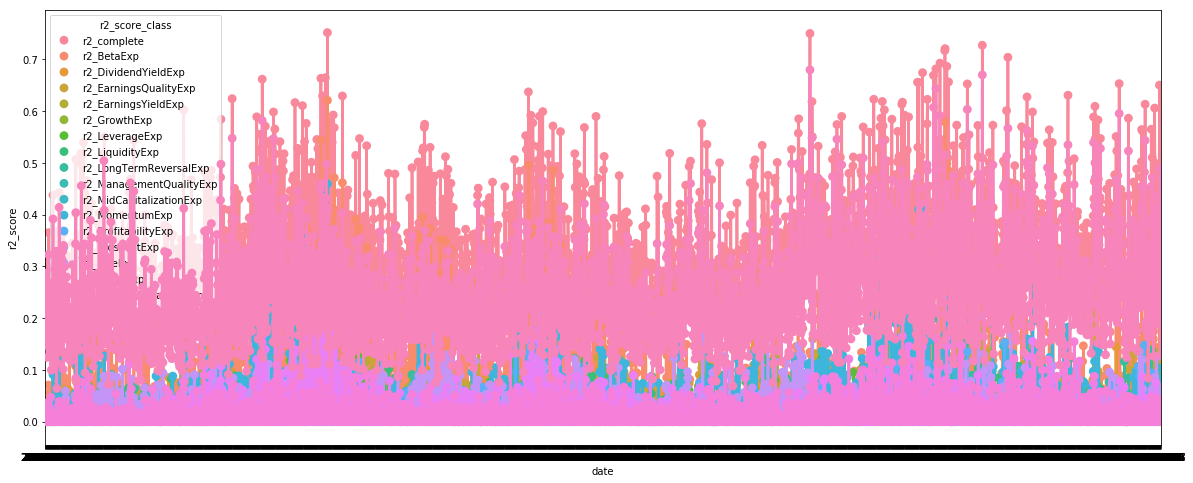

In [138]:
import matplotlib.pyplot as plt

date = Timestamp
df1 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_complete)})
df_1 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[0][0])})
df_2 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[1][0])})
df_3 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[2][0])})
df_4 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[3][0])})
df_5 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[4][0])})
df_6 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[5][0])})
df_7 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[6][0])})
df_8 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[7][0])})
df_9 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[8][0])})
df_10 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[9][0])})
df_11 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[10][0])})
df_12 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[11][0])})
df_13 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[12][0])})
df_14 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[13][0])})
df_15 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[14][0])})
df_16 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[15][0])})
df_17 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_industry)})




df1['r2_score_class'] = 'r2_complete'
df_1['r2_score_class'] = 'r2_BetaExp'
df_2['r2_score_class'] = 'r2_DividendYieldExp'
df_3['r2_score_class'] = 'r2_EarningsQualityExp'
df_4['r2_score_class'] = 'r2_EarningsYieldExp'
df_5['r2_score_class'] = 'r2_GrowthExp'
df_6['r2_score_class'] = 'r2_LeverageExp'
df_7['r2_score_class'] = 'r2_LiquidityExp'
df_8['r2_score_class'] = 'r2_LongTermReversalExp'
df_9['r2_score_class'] = 'r2_ManagementQualityExp'
df_10['r2_score_class'] = 'r2_MidCapitalizationExp'
df_11['r2_score_class'] = 'r2_MomentumExp'
df_12['r2_score_class'] = 'r2_ProfitabilityExp'
df_13['r2_score_class'] = 'r2_ProspectExp'
df_14['r2_score_class'] = 'r2_SizeExp'
df_15['r2_score_class'] = 'r2_ValueExp'
df_16['r2_score_class'] = 'r2_ResidualVolatilityExp'
df_17['r2_score_class'] = 'r2_indusrty'




df = pd.concat([df1,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17])
x_col='date'
y_col = 'r2_score'
fig = plt.figure(figsize=(20,8))
sns.pointplot(x=x_col,y=y_col,data=df,hue='r2_score_class')

In [118]:
print('The average R Square of %s is %.5f'% ('complete exposures', np.mean(r2_complete)))
print('The average R Square of %s is %.5f'% ('BetaExp', np.mean(r2_submodels[0][0])))
print('The average R Square of %s is %.5f'% ('DividendYieldExp', np.mean(r2_submodels[1][0])))
print('The average R Square of %s is %.5f'% ('EarningsQualityExp', np.mean(r2_submodels[2][0])))
print('The average R Square of %s is %.5f'% ('EarningsYieldExp)', np.mean(r2_submodels[3][0])))
print('The average R Square of %s is %.5f'% ('GrowthExp', np.mean(r2_submodels[4][0])))
print('The average R Square of %s is %.5f'% ('LeverageExp', np.mean(r2_submodels[5][0])))
print('The average R Square of %s is %.5f'% ('LiquidityExp', np.mean(r2_submodels[6][0])))
print('The average R Square of %s is %.5f'% ('LongTermReversalExp', np.mean(r2_submodels[7][0])))
print('The average R Square of %s is %.5f'% ('ManagementQualityExp', np.mean(r2_submodels[8][0])))
print('The average R Square of %s is %.5f'% ('MidCapitalizationExp', np.mean(r2_submodels[9][0])))
print('The average R Square of %s is %.5f'% ('MomentumExp', np.mean(r2_submodels[10][0])))
print('The average R Square of %s is %.5f'% ('ProfitabilityExp', np.mean(r2_submodels[11][0])))
print('The average R Square of %s is %.5f'% ('ProspectExp', np.mean(r2_submodels[12][0])))
print('The average R Square of %s is %.5f'% ('SizeExp', np.mean(r2_submodels[13][0])))
print('The average R Square of %s is %.5f'% ('ValueExp', np.mean(r2_submodels[14][0])))
print('The average R Square of %s is %.5f'% ('ResidualVolatilityExp', np.mean(r2_submodels[15][0])))
print('The average R Square of %s is %.5f'% ('IndustryExp', np.mean(r2_industry)))

The average R Square of complete exposures is 0.31476
The average R Square of BetaExp is 0.05751
The average R Square of DividendYieldExp is 0.01650
The average R Square of EarningsQualityExp is 0.02225
The average R Square of EarningsYieldExp) is 0.01155
The average R Square of GrowthExp is 0.01110
The average R Square of LeverageExp is 0.01230
The average R Square of LiquidityExp is 0.01367
The average R Square of LongTermReversalExp is 0.00971
The average R Square of ManagementQualityExp is 0.00513
The average R Square of MidCapitalizationExp is 0.00808
The average R Square of MomentumExp is 0.03059
The average R Square of ProfitabilityExp is 0.01242
The average R Square of ProspectExp is 0.00300
The average R Square of SizeExp is 0.01952
The average R Square of ValueExp is 0.01714
The average R Square of ResidualVolatilityExp is 0.01487
The average R Square of IndustryExp is 0.24366


In [123]:
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('BetaExp', np.mean(r2_submodels[0][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('DividendYieldExp', np.mean(r2_submodels[1][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('EarningsQualityExp', np.mean(r2_submodels[2][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('EarningsYieldExp)', np.mean(r2_submodels[3][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('GrowthExp', np.mean(r2_submodels[4][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('LeverageExp', np.mean(r2_submodels[5][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('LiquidityExp', np.mean(r2_submodels[6][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('LongTermReversalExp', np.mean(r2_submodels[7][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('ManagementQualityExp', np.mean(r2_submodels[8][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('MidCapitalizationExp', np.mean(r2_submodels[9][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('MomentumExp', np.mean(r2_submodels[10][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('ProfitabilityExp', np.mean(r2_submodels[11][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('ProspectExp', np.mean(r2_submodels[12][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('SizeExp', np.mean(r2_submodels[13][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('ValueExp', np.mean(r2_submodels[14][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('ResidualVolatilityExp', np.mean(r2_submodels[15][0])*100/np.mean(r2_complete)))
print('The ratio of %s r2 over complete r2 is %.2f%%'% ('IndustryExp', np.mean(r2_industry)*100/np.mean(r2_complete)))

The ratio of BetaExp r2 over complete r2 is 18.27%
The ratio of DividendYieldExp r2 over complete r2 is 5.24%
The ratio of EarningsQualityExp r2 over complete r2 is 7.07%
The ratio of EarningsYieldExp) r2 over complete r2 is 3.67%
The ratio of GrowthExp r2 over complete r2 is 3.53%
The ratio of LeverageExp r2 over complete r2 is 3.91%
The ratio of LiquidityExp r2 over complete r2 is 4.34%
The ratio of LongTermReversalExp r2 over complete r2 is 3.08%
The ratio of ManagementQualityExp r2 over complete r2 is 1.63%
The ratio of MidCapitalizationExp r2 over complete r2 is 2.57%
The ratio of MomentumExp r2 over complete r2 is 9.72%
The ratio of ProfitabilityExp r2 over complete r2 is 3.95%
The ratio of ProspectExp r2 over complete r2 is 0.95%
The ratio of SizeExp r2 over complete r2 is 6.20%
The ratio of ValueExp r2 over complete r2 is 5.44%
The ratio of ResidualVolatilityExp r2 over complete r2 is 4.72%
The ratio of IndustryExp r2 over complete r2 is 77.41%


# Check the R2 Square of daily regression from 2006 to 2018 
## Calculate the average R2 square
### Note: the following codes are for complete exposures and exposures lacking one style factor at a time
### the R2 square is calculated on a daily basis so it would be extremely slow to rerun the following codes

In [103]:
start_date='20060101'
end_date='20181231'

loadings = h.read('DailyFactor', start=start_date, end=end_date)
# count(distinct(date)) to get the number of available dates, N
Ndays=loadings['date'].unique().shape[0]
# count(*) group by TICKER_US to get a table with number of records (dates) for each ticker
loadings_ndays=loadings[['date', 'ticker']].groupby('ticker').count().reset_index()
tickers=loadings_ndays[loadings_ndays['date']==Ndays]['ticker']
# Filter the table above by selecting the ticker with number of records (days) equal to N
loadings=loadings.loc[loadings['ticker'].isin(list(tickers))]
# Note that the Return data stored in risklab has left out the percentage
loadings['ReturnPct']=loadings['ReturnPct']*0.01

# shifting tomorrow's return to today's row
loadings['return_shift'] = loadings.groupby('ticker')['ReturnPct'].shift(-1)
loadings=loadings.dropna()
# set multiindex       
loadings=loadings.set_index(['date', 'ticker']).sort_index()
# draw out the timestamp for every month
M=loadings.index.get_level_values(0)
Timestamp = []
for i in M:
    if not i in Timestamp:
        Timestamp.append(i)



residual = pd.DataFrame()
r2_complete = []
for i in range(len(Timestamp)):
    Xi = pd.DataFrame()
    # For each month, we load 'retun_shift' 
    Yi = np.array((loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True))
    for j in range(len(name_list)):                        
        # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
        Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[j]]).reset_index(drop=True))
        Xi[j] = Xij

    # linear regression
    linreg.fit(Xi, Yi)
    residuali = np.array(Yi - linreg.predict(Xi))
    residual[i]=residuali
    r2_completei = r2_score(Yi, linreg.predict(Xi))
    r2_complete.append(r2_completei)

max_k = 16
r2_submodels = [[] for _ in range(max_k)]
for k in range(16):            
    residual = pd.DataFrame()
    r2_sub = []
    for i in range(len(Timestamp)):
        Xi = pd.DataFrame()
        # For each month, we load 'retun_shift' 
        Yi = np.array((loadings.loc[(Timestamp[i],slice(None)),'return_shift']).reset_index(drop=True))

        for j in range(len(name_list)):
            if j == k:
                continue

            # For each month, we load all the exposures and store them as a dataframe. The columns of the dataframe are the regressors we will use.
            Xij = np.array((loadings.loc[(Timestamp[i],slice(None)),name_list[j]]).reset_index(drop=True))
            Xi[j] = Xij

        # linear regression
        linreg.fit(Xi, Yi)
        residuali = np.array(Yi - linreg.predict(Xi))
        residual[i]=residuali
        r2_subi = r2_score(Yi, linreg.predict(Xi))
        r2_sub.append(r2_subi)
    r2_submodels[k].append(r2_sub)

    # r2_score_submodels[i][j] - i-th model, j-th day
    # r2_score_submodels[i][:],



/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


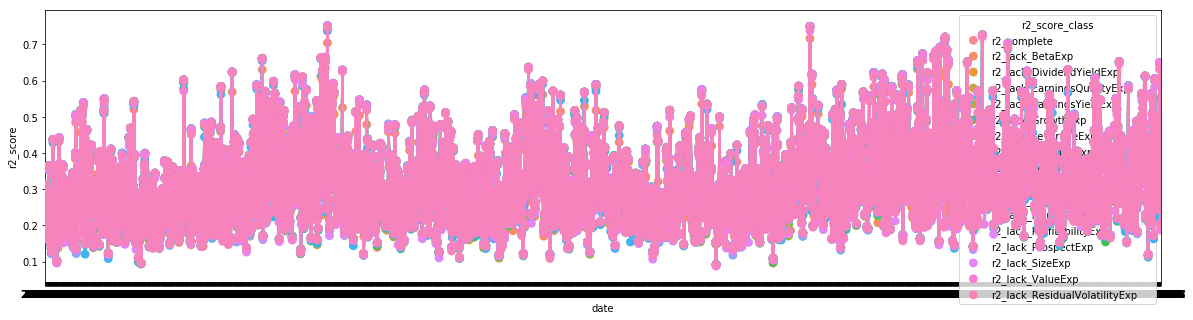

In [104]:
import matplotlib.pyplot as plt

date = Timestamp
df1 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_complete)})
df_1 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[0][0])})
df_2 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[1][0])})
df_3 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[2][0])})
df_4 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[3][0])})
df_5 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[4][0])})
df_6 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[5][0])})
df_7 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[6][0])})
df_8 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[7][0])})
df_9 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[8][0])})
df_10 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[9][0])})
df_11 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[10][0])})
df_12 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[11][0])})
df_13 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[12][0])})
df_14 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[13][0])})
df_15 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[14][0])})
df_16 = pd.DataFrame({"date":date, "r2_score" : np.array(r2_submodels[15][0])})




df1['r2_score_class'] = 'r2_complete'
df_1['r2_score_class'] = 'r2_lack_BetaExp'
df_2['r2_score_class'] = 'r2_lack_DividendYieldExp'
df_3['r2_score_class'] = 'r2_lack_EarningsQualityExp'
df_4['r2_score_class'] = 'r2_lack_EarningsYieldExp'
df_5['r2_score_class'] = 'r2_lack_GrowthExp'
df_6['r2_score_class'] = 'r2_lack_LeverageExp'
df_7['r2_score_class'] = 'r2_lack_LiquidityExp'
df_8['r2_score_class'] = 'r2_lack_LongTermReversalExp'
df_9['r2_score_class'] = 'r2_lack_ManagementQualityExp'
df_10['r2_score_class'] = 'r2_lack_MidCapitalizationExp'
df_11['r2_score_class'] = 'r2_lack_MomentumExp'
df_12['r2_score_class'] = 'r2_lack_ProfitabilityExp'
df_13['r2_score_class'] = 'r2_lack_ProspectExp'
df_14['r2_score_class'] = 'r2_lack_SizeExp'
df_15['r2_score_class'] = 'r2_lack_ValueExp'
df_16['r2_score_class'] = 'r2_lack_ResidualVolatilityExp'




df = pd.concat([df1,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16])
x_col='date'
y_col = 'r2_score'
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,1,1)
sns.pointplot(x=x_col,y=y_col,data=df,hue='r2_score_class')

In [105]:
print('The average R Square of %s is %.5f'% ('complete exposures', np.mean(r2_complete)))
print('The average R Square of %s is %.5f'% ('exposures (lack BetaExp)', np.mean(r2_submodels[0][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack DividendYieldExp)', np.mean(r2_submodels[1][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack EarningsQualityExp)', np.mean(r2_submodels[2][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack EarningsYieldExp)', np.mean(r2_submodels[3][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack GrowthExp)', np.mean(r2_submodels[4][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack LeverageExp)', np.mean(r2_submodels[5][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack LiquidityExp)', np.mean(r2_submodels[6][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack LongTermReversalExp)', np.mean(r2_submodels[7][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack ManagementQualityExp)', np.mean(r2_submodels[8][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack MidCapitalizationExp)', np.mean(r2_submodels[9][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack MomentumExp)', np.mean(r2_submodels[10][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack ProfitabilityExp)', np.mean(r2_submodels[11][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack ProspectExp)', np.mean(r2_submodels[12][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack SizeExp)', np.mean(r2_submodels[13][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack ValueExp)', np.mean(r2_submodels[14][0])))
print('The average R Square of %s is %.5f'% ('exposures (lack ResidualVolatilityExp)', np.mean(r2_submodels[15][0])))

The average R Square of complete exposures is 0.31476
The average R Square of exposures (lack BetaExp) is 0.30350
The average R Square of exposures (lack DividendYieldExp) is 0.31320
The average R Square of exposures (lack EarningsQualityExp) is 0.31312
The average R Square of exposures (lack EarningsYieldExp) is 0.31231
The average R Square of exposures (lack GrowthExp) is 0.31335
The average R Square of exposures (lack LeverageExp) is 0.31300
The average R Square of exposures (lack LiquidityExp) is 0.31268
The average R Square of exposures (lack LongTermReversalExp) is 0.31309
The average R Square of exposures (lack ManagementQualityExp) is 0.31358
The average R Square of exposures (lack MidCapitalizationExp) is 0.31196
The average R Square of exposures (lack MomentumExp) is 0.30957
The average R Square of exposures (lack ProfitabilityExp) is 0.31328
The average R Square of exposures (lack ProspectExp) is 0.31367
The average R Square of exposures (lack SizeExp) is 0.30854
The average